In [1]:
import os
os.getcwd()
        

'/Users/sinazabanfahm/FinAT/utils'

In [2]:
from time_series import BasicTSTransformer
asset = yf.Ticker('MSFT')
t = asset.history('60d')['Close']
t_log_ret = BasicTSTransformer(t).log_returns()
ts_transformer = BasicTSTransformer(t_log_ret)
smoothed_20 = ts_transformer.exponential_smoothing(look_back = 20)[:50]
smoothed_5 = ts_transformer.exponential_smoothing(look_back = 5)[:50]
smoothed_2 = ts_transformer.exponential_smoothing(look_back = 2)[:50]


NameError: name 'yf' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t_log_ret.index[:50], t_log_ret.values[:50], label='MSFT_CLOSE_LOG_RET', color='blue')
plt.plot(smoothed_2.index, smoothed_2.values, label='MSFT_CLOSE_LOG_RET_2', color='green')
plt.plot(smoothed_5.index,smoothed_5.values, label = 'MSFT_CLOSE_LOG_RET_5', color='orange')
plt.plot(smoothed_20.index,smoothed_20.values, label = 'MSFT_CLOSE_LOG_RET_20', color='red')

plt.title('Exponential Smoothing with different look_back')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.savefig("smoothings")
plt.show()


In [5]:
import yfinance as yf

In [6]:
ticker = yf.Ticker("MSFT")
df = ticker.history('1y')

In [7]:
df['Close']

Date
2023-10-30 00:00:00-04:00    334.796997
2023-10-31 00:00:00-04:00    335.591034
2023-11-01 00:00:00-04:00    343.491730
2023-11-02 00:00:00-04:00    345.724976
2023-11-03 00:00:00-04:00    350.171570
                                ...    
2024-10-22 00:00:00-04:00    427.510010
2024-10-23 00:00:00-04:00    424.600006
2024-10-24 00:00:00-04:00    424.730011
2024-10-25 00:00:00-04:00    428.149994
2024-10-28 00:00:00-04:00    426.589996
Name: Close, Length: 251, dtype: float64

In [7]:
import os

In [24]:
import pandas as pd
class Indicators:
    def __init__(self):
        pass
    def smoothed_rsi(self,ts: pd.core.series.Series, look_back: int):
        if look_back <1 :
            raise ValueError("look_back must be greater than 1")
        
        up_sum, dn_sum = 10**(-7) + 1,10**(-7) + 1
        for i in range(1,look_back):
            diff = ts[i] - ts[i-1]
            if diff > 0:
                up_sum += diff
            else:
                dn_sum += diff
        up_sum = up_sum/(look_back - 1)
        dn_sum = dn_sum / (look_back - 1)
        transformed = ts.copy()
        for i in range(look_back, len(ts)):
            diff = ts[i] - ts[i-1]
            if diff > 0:
                up_sum = ((look_back - 1 )* up_sum + diff )/look_back
                dn_sum = (look_back -1) * dn_sum/look_back
            else:
                dn_sum = ((look_back - 1 )* dn_sum - diff )/look_back
                up_sum = (look_back -1) * up_sum/look_back
            transformed[i] = 100 * (up_sum)/(up_sum + dn_sum)
        return transformed




        

In [29]:
I_2 = Indicators().smoothed_rsi(ts = df['Close'],look_back = 2)
I_15 = Indicators().smoothed_rsi(ts = df['Close'],look_back = 15)

In [26]:
import 

SyntaxError: invalid syntax (2494350585.py, line 1)

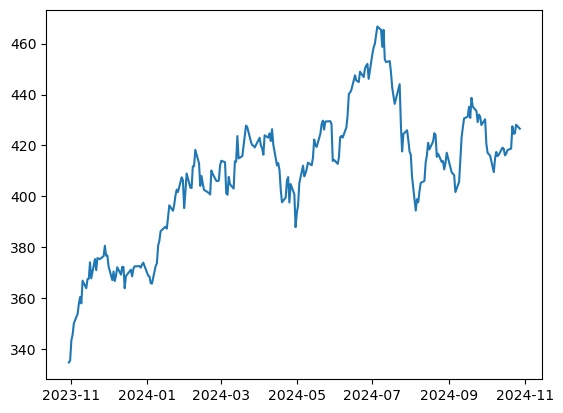

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()

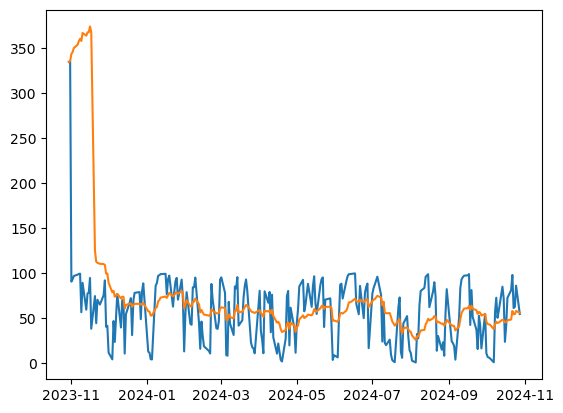

In [30]:
plt.plot(I_2)
plt.plot(I_15)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t_log_ret.index[:50], t_log_ret.values[:50], label='MSFT_CLOSE_LOG_RET', color='blue')
plt.plot(df['Close'].index, df['close'.values, label='MSFT_CLOSE_LOG_RET_2', color='green')
plt.plot(smoothed_5.index,smoothed_5.values, label = 'MSFT_CLOSE_LOG_RET_5', color='orange')
plt.plot(smoothed_20.index,smoothed_20.values, label = 'MSFT_CLOSE_LOG_RET_20', color='red')

plt.title('Exponential Smoothing with different look_back')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.savefig("smoothings")
plt.show()
